In [16]:
# import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read csvs into DF

org_profile = pd.read_csv('Data/organization_profiles.csv')

tweets1 = pd.read_csv('Data/tweets_all_revised2.csv')

tweets2 = pd.read_excel('Data/tweets_all_revised2.xlsx')

In [19]:
org_profile.head()

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region


In [30]:
# value counts of agency category
org_profile['agency_catergory'].value_counts()

Community and Social Services        21
Arts, Culture and Heritage           11
Disabilities                         10
Children, Youth and Family           10
Sports, Recreation and Leisure        7
Health and Wellness                   4
Environment                           3
Immigration and Settlement            3
Criminal Justice and Civil Rights     2
Literacy and Skills Development       2
Education Institution                 2
Grant-Giving Foundation               2
Library and Research                  2
Employment                            2
Animals                               2
Seniors                               2
LGBTQ                                 1
Name: agency_catergory, dtype: int64

In [63]:
# followers grouped by agency category
followers_by_cat = org_profile.groupby(['agency_catergory']).sum()['followers_count']

Text(0.5, 0, 'Agency Categories')

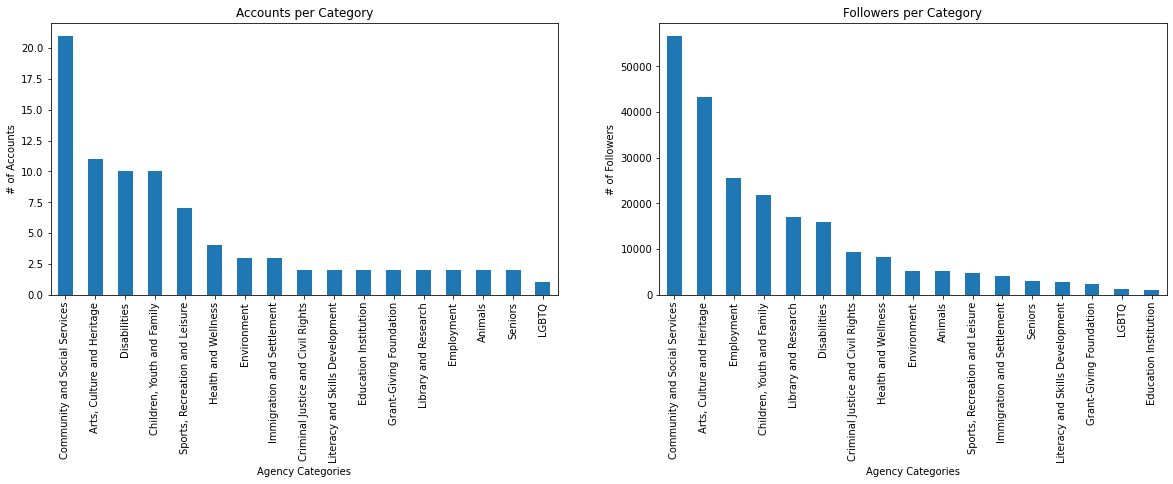

In [64]:
# Plot counts of agencies per category and sum of followers per category

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

org_profile['agency_catergory'].value_counts().plot.bar(ax=axes[0])
followers_by_cat.sort_values(ascending=False).plot.bar(ax=axes[1])

axes[0].set_title('Accounts per Category')
axes[0].set_ylabel('# of Accounts')
axes[0].set_xlabel('Agency Categories')

axes[1].set_title('Followers per Category')
axes[1].set_ylabel('# of Followers')
axes[1].set_xlabel('Agency Categories')

In [20]:
tweets1.head()

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


<AxesSubplot:ylabel='Frequency'>

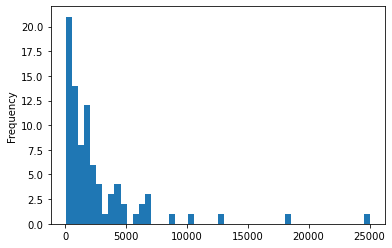

In [17]:
org_profile['followers_count'].plot.hist(bins=50)

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followers_count', ylabel='Density'>

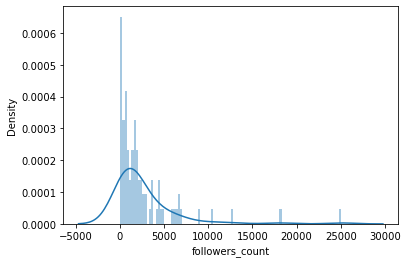

In [18]:
# plot distribution of followers
sns.distplot(org_profile['followers_count'], bins=100)

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='friends_count', ylabel='Density'>

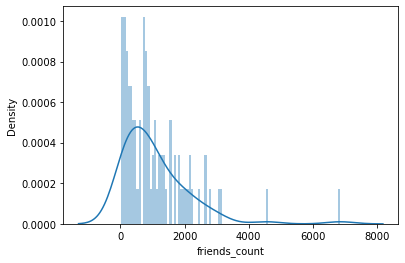

In [21]:
# plot distribution of friends
sns.distplot(org_profile['friends_count'], bins=100)

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='favorite_count', ylabel='Density'>

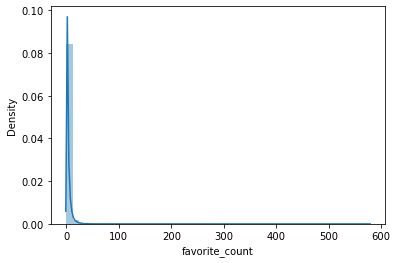

In [23]:
# plot the distribution of likes and retweets
sns.distplot(tweets1['favorite_count'])

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

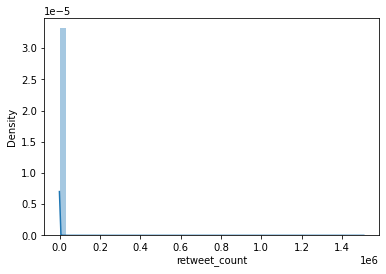

In [28]:
sns.distplot(tweets1['retweet_count'])